# Pre-processing and creating model for deployment

### Importing all required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib
import  shap
import dabl

### Loading and Reading the Dataset

In [4]:
df = pd.read_csv("road_traffic_accident.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
## checking for null values
df.isnull().sum()

Time 0
Day_of_week 0
Age_band_of_driver 0
Sex_of_driver 0
Educational_level 741
Vehicle_driver_relation 579
Driving_experience 829
Type_of_vehicle 950
Owner_of_vehicle 482
Service_year_of_vehicle 3928
Defect_of_vehicle 4427
Area_accident_occured 239
Lanes_or_Medians 385
Road_allignment 142
Types_of_Junction 887
Road_surface_type 172
Road_surface_conditions 0
Light_conditions 0
Weather_conditions 0
Type_of_collision 155
Number_of_vehicles_involved 0
Number_of_casualties 0
Vehicle_movement 308
Casualty_class 0
Sex_of_casualty 0
Age_band_of_casualty 0
Casualty_severity 0
Work_of_casuality 3198
Fitness_of_casuality 2635
Pedestrian_movement 0
Cause_of_accident 0
Accident_severity 0
dtype: int64

#### Accident Severity

In [7]:
## Accident severity
df['Accident_severity'].value_counts()

Slight Injury 10415
Serious Injury 1743
Fatal injury 158
Name: Accident_severity, dtype: int64

<AxesSubplot:>

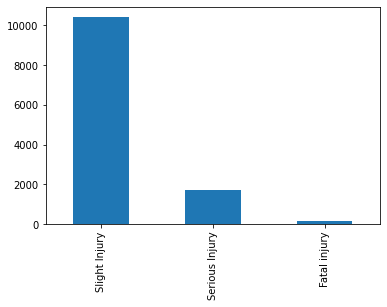

In [8]:
## vizualizing accident severity
df['Accident_severity'].value_counts().plot(kind='bar')

**Observation**
* The data is highle imbalanced

**Note:-**
*Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations*

#### Educational level

In [9]:
## educational level
df['Educational_level'].value_counts()

Junior high school 7619
Elementary school 2163
High school 1110
Above high school 362
Writing & reading 176
Unknown 100
Illiterate 45
Name: Educational_level, dtype: int64

<AxesSubplot:>

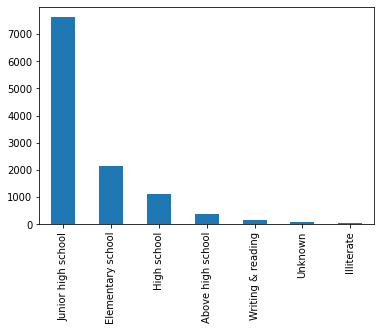

In [10]:
## vizualize
df['Educational_level'].value_counts().plot(kind='bar')

#### Education level v/s Accident severity

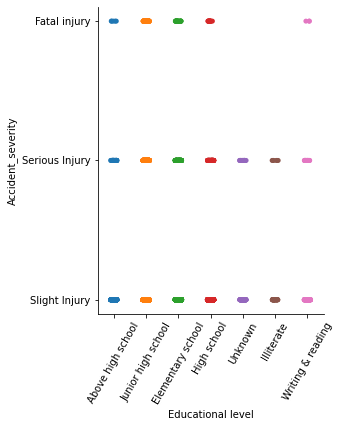

In [11]:
# plot a point plot for categorical features and target variable
sns.catplot(x='Educational_level', y='Accident_severity',data=df)
plt.xlabel("Educational level")
plt.xticks(rotation=60)
plt.show()

### dabl data analysis

Target looks like classification
Showing only top 10 of 32 categorical features


[None, None]

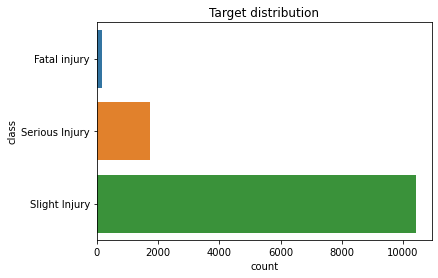

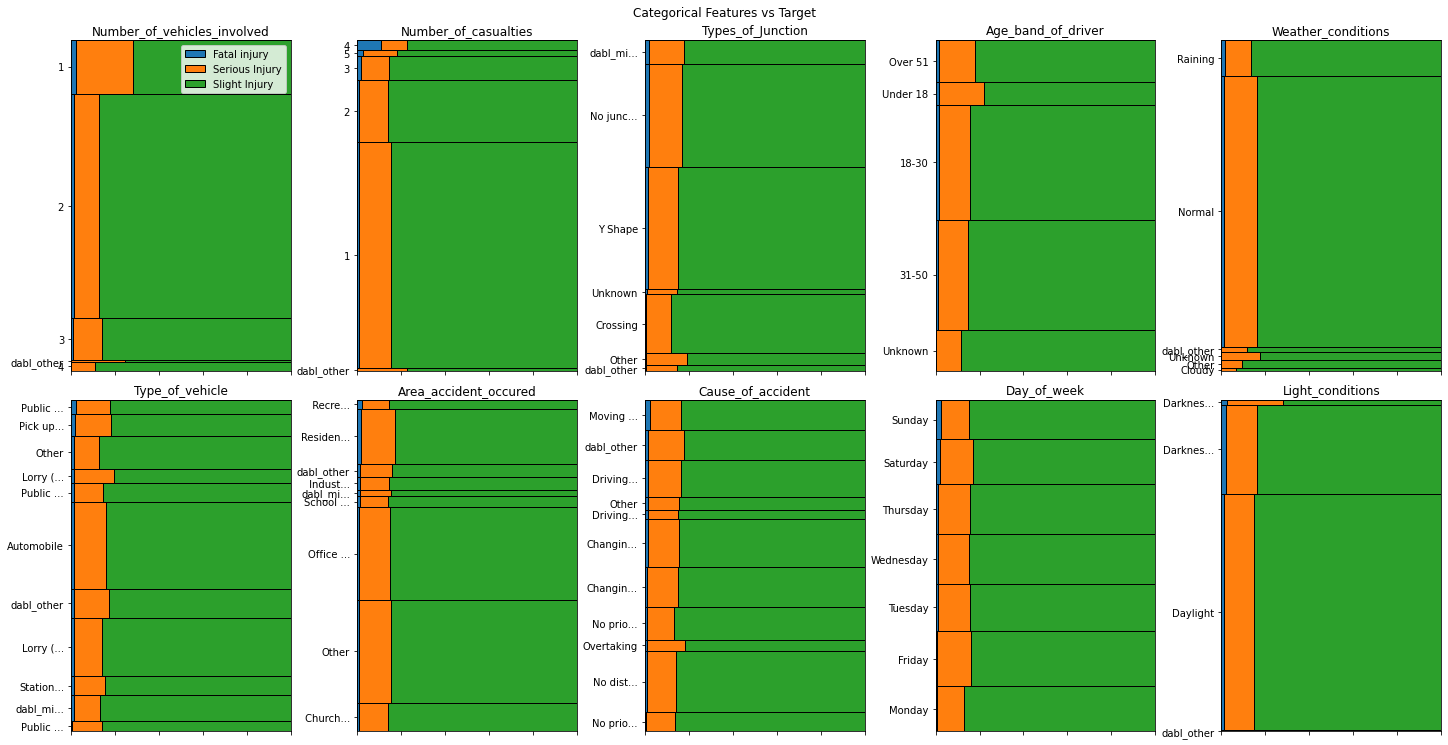

In [12]:
dabl.plot(df, target_col='Accident_severity')

In [13]:
df.corr()

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


#### Insight from initial analysis
- More the Number of casualties, higher the chances of fatal injuries at accident site
- More the vehicles involved higher the chances of Serious injury
- Light_conditions being darkness can cause higher serious injury
- data is highly imbalanced
- Features like area_accident_occured, Cause_of_accident, Day_of_week, type_of_junction seem to be imporatant features causing fatal injuries
- Road_surface and road conditions do not affect fatal or serious accidents apparently

#### Road Surface

In [14]:
df['Road_surface_type'].value_counts()

Asphalt roads 11296
Earth roads 358
Gravel roads 242
Other 167
Asphalt roads with some distress 81
Name: Road_surface_type, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Asphalt roads'),
  Text(1, 0, 'Earth roads'),
  Text(2, 0, 'Asphalt roads with some distress'),
  Text(3, 0, 'Gravel roads'),
  Text(4, 0, 'Other')])

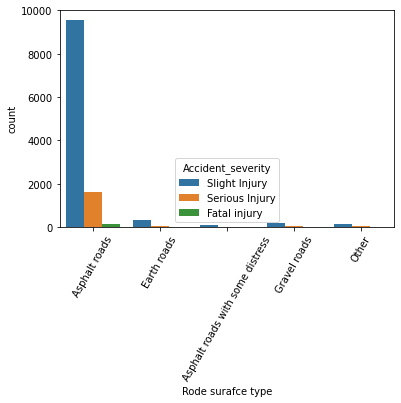

In [15]:
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Dry'),
  Text(1, 0, 'Wet or damp'),
  Text(2, 0, 'Snow'),
  Text(3, 0, 'Flood over 3cm. deep')])

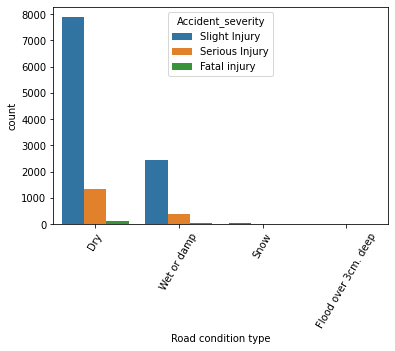

In [16]:
print(df['Road_surface_conditions'].value_counts())

sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=df)
plt.xlabel('Road condition type')
plt.xticks(rotation=60)

### Creating the pivot table for Accident severity

In [17]:
pivot_df = pd.pivot_table(data=df, 
               index='Road_surface_conditions', 
               columns='Accident_severity',
               aggfunc='count')

fatal_df = pivot_df['Road_surface_type']
fatal_df.fillna(0, inplace=True)
fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']
fatal_df

Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum_of_injuries
Road_surface_conditions,,,,
Dry,121.0,1312.0,7774.0,9207.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,65.0,69.0
Wet or damp,36.0,404.0,2426.0,2866.0


#### percentage of injuries due to road surface condition

In [18]:
## Dry
fatal_df_dry = (fatal_df.loc['Dry']/fatal_df.loc['Dry','sum_of_injuries'])*100
fatal_df_dry

Accident_severity
Fatal injury 1.314217
Serious Injury 14.250027
Slight Injury 84.435755
sum_of_injuries 100.000000
Name: Dry, dtype: float64

In [19]:
## snow
fatal_df_snow = (fatal_df.loc['Wet or damp']/fatal_df.loc['Wet or damp','sum_of_injuries'])*100
fatal_df_snow

Accident_severity
Fatal injury 1.256106
Serious Injury 14.096301
Slight Injury 84.647592
sum_of_injuries 100.000000
Name: Wet or damp, dtype: float64

### Grouping the road surface condition

In [20]:
df.groupby('Road_surface_conditions')['Accident_severity'].count()

Road_surface_conditions
Dry 9340
Flood over 3cm. deep 2
Snow 70
Wet or damp 2904
Name: Accident_severity, dtype: int64

#### Converting to data time

In [21]:
df['Time'] = pd.to_datetime(df['Time'])

In [22]:
## taking only object columns
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
## removing Accident_severity
obj_cols2 = [col for col in obj_cols if col != 'Accident_severity']
obj_cols2

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident']

#### Extracting hours from date-time

In [23]:
# remove time column from datafram
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


#### Printing count plot of independent variable vs Target

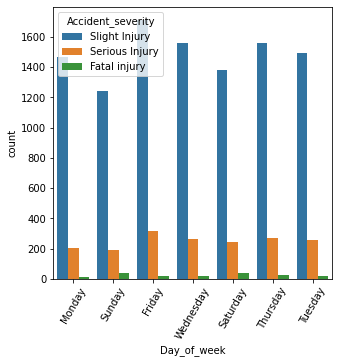

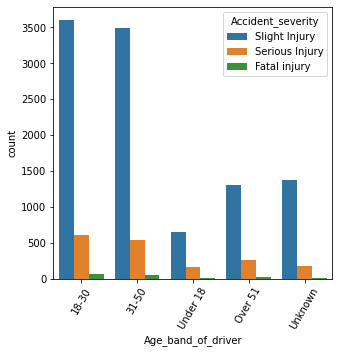

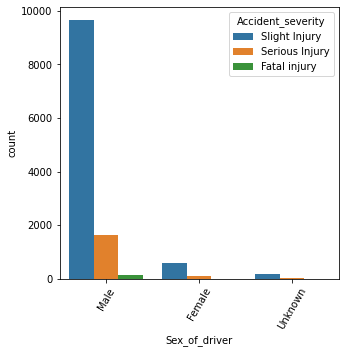

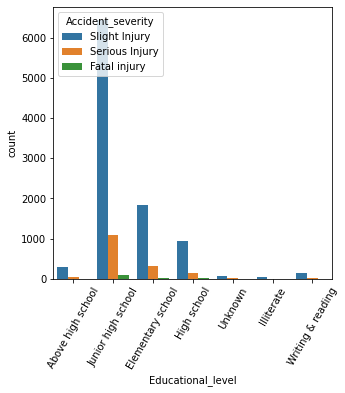

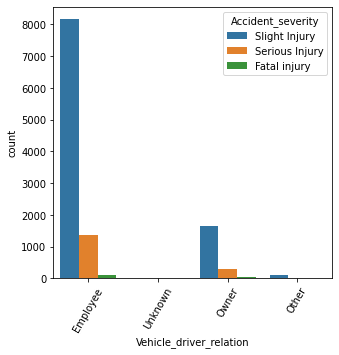

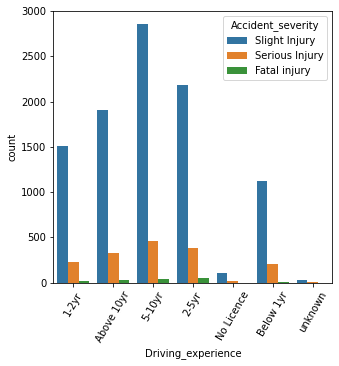

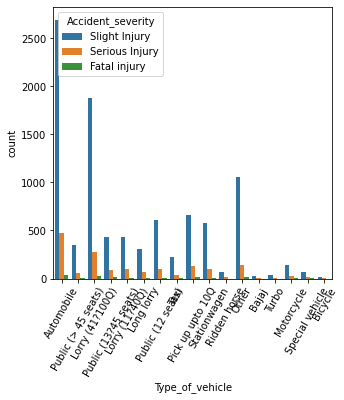

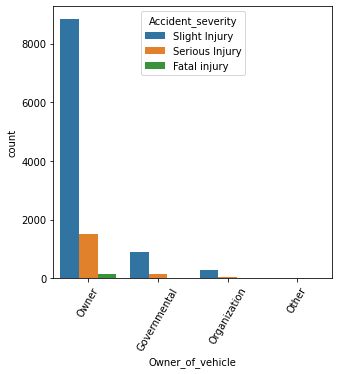

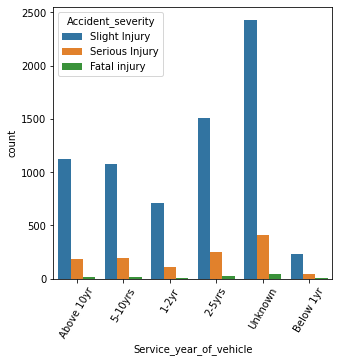

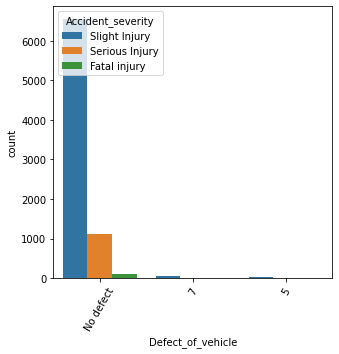

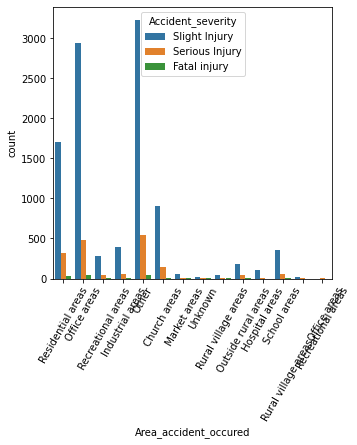

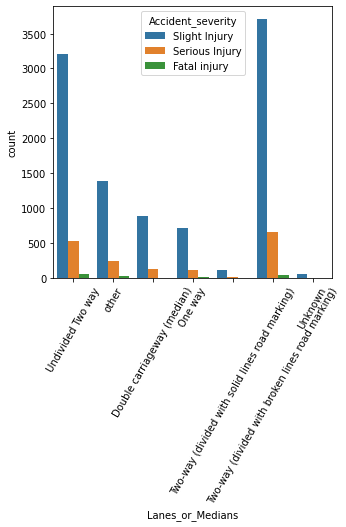

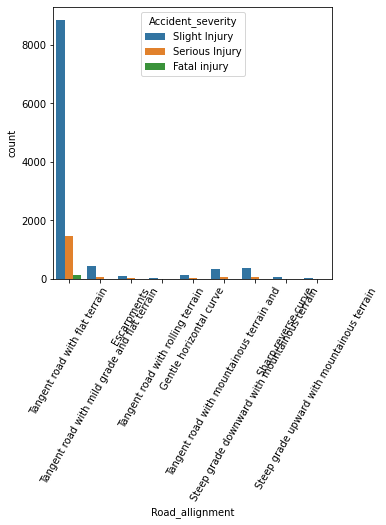

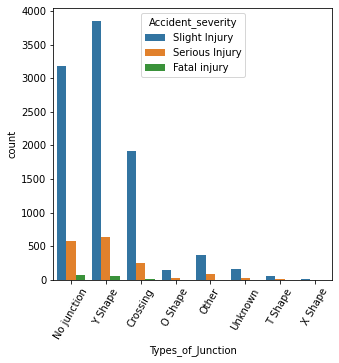

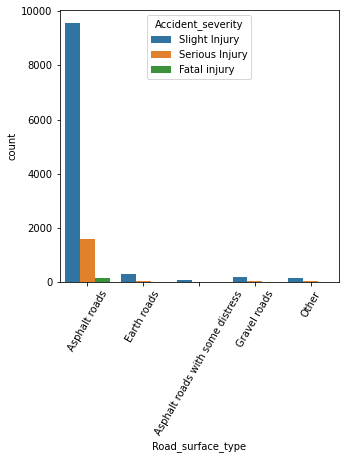

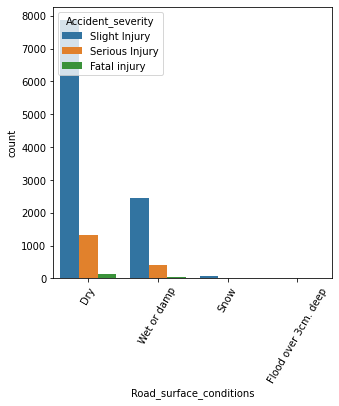

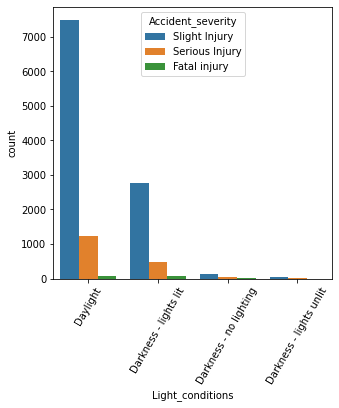

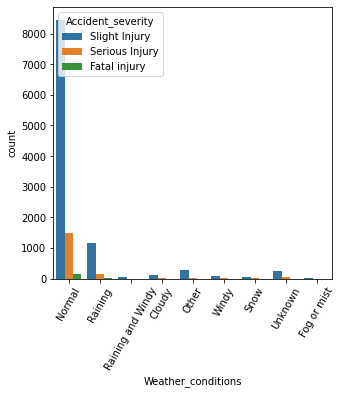

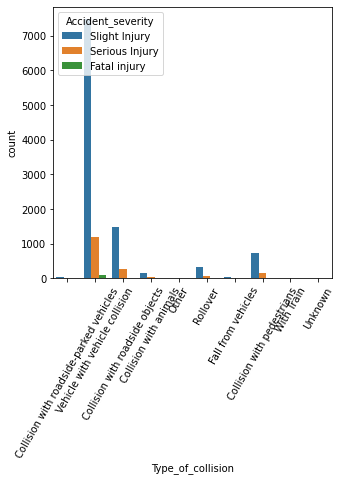

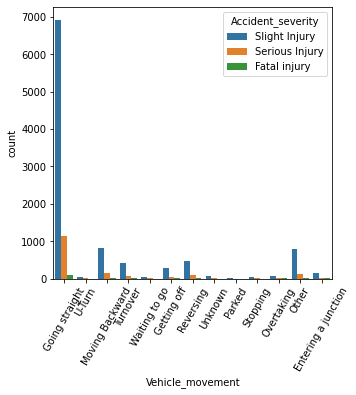

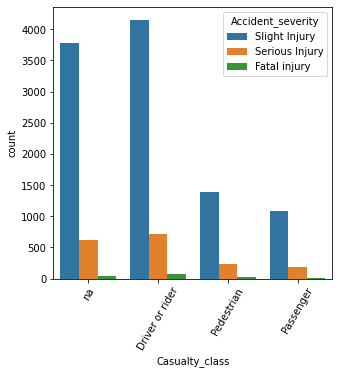

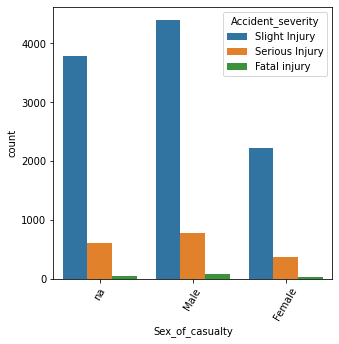

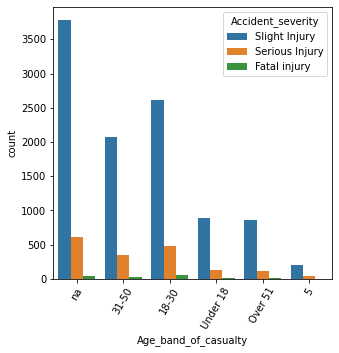

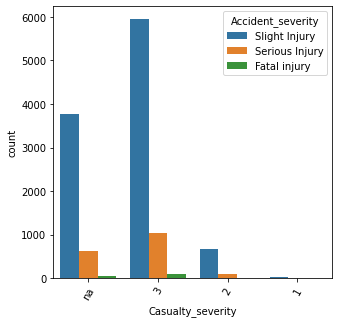

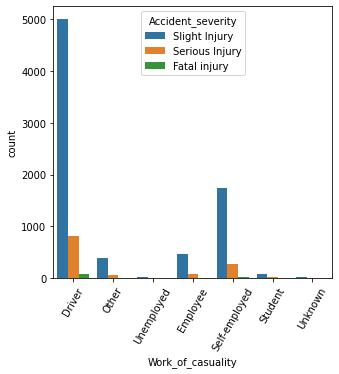

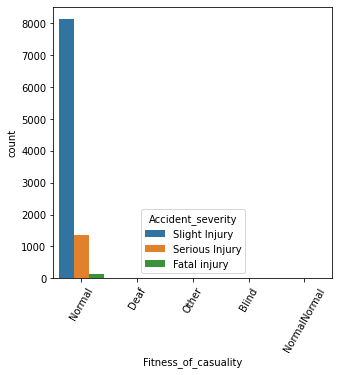

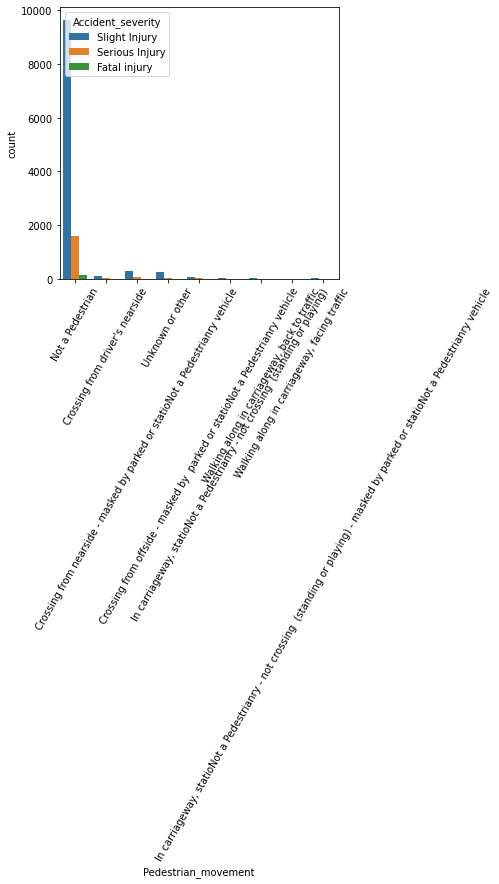

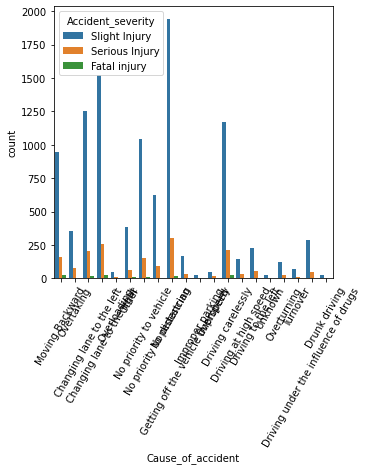

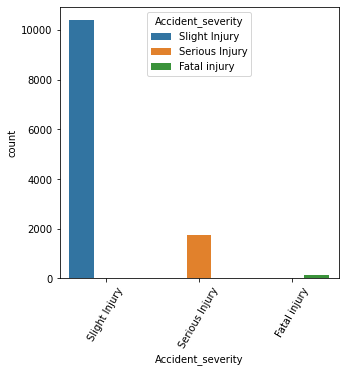

In [24]:
def count_plot(col):
    n_df[col].value_counts()
    
    # plot the figure of count plot
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, hue='Accident_severity', data=n_df)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=60)
    plt.show()
    
for col in obj_cols:
    count_plot(col)

#### Feature selection

In [25]:
# feature selection based on visualization
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)

17

#### new dataset

In [26]:
# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_severity']

In [27]:
# meta data of the new sub dataset
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

#### Handling missing features

In [28]:
feature_df = featureset_df.copy()

In [29]:
## NaN are missing because service info might not be available, we will fill as 'Unknowns'
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

In [30]:
## One Hot Encoding
X = feature_df[features]
y = target

In [31]:
# we will use pandas get_dummies method for one-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [32]:
## label encoding taget
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [33]:
## mutual info classif to check informative features
mi_calc = mutual_info_classif(encoded_df, y_en, random_state=42)

In [34]:
mi_df = pd.DataFrame({'Columns':encoded_df.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False).head(15)

,Columns,MI_score
1,Number_of_casualties,0.013183
0,Number_of_vehicles_involved,0.013009
46,Type_of_vehicle_Long lorry,0.006190
69,Service_year_of_vehicle_Below 1yr,0.005561
28,Types_of_Junction_Y Shape,0.005364
11,Area_accident_occured_ Hospital areas,0.005284
61,Driving_experience_5-10yr,0.005004
26,Types_of_Junction_Unknown,0.004723
104,Cause_of_accident_Turnover,0.004536
5,Day_of_week_Sunday,0.004210


#### Selecting feature after one hot encoding

In [35]:
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
cols = fs.get_feature_names_out()

In [36]:
cols

array(['Number_of_vehicles_involved', 'Number_of_casualties',
 'Hour_of_Day', 'Day_of_week_Monday', 'Day_of_week_Saturday',
 'Day_of_week_Sunday', 'Area_accident_occured_ Recreational areas',
 'Area_accident_occured_ Hospital areas',
 'Area_accident_occured_ Outside rural areas',
 'Area_accident_occured_Recreational areas',
 'Area_accident_occured_Residential areas',
 'Area_accident_occured_Rural village areas',
 'Area_accident_occured_Rural village areasOffice areas',
 'Types_of_Junction_No junction', 'Types_of_Junction_Other',
 'Types_of_Junction_Unknown', 'Types_of_Junction_X Shape',
 'Age_band_of_driver_31-50', 'Age_band_of_driver_Over 51',
 'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown',
 'Sex_of_driver_Unknown', 'Vehicle_driver_relation_Owner',
 'Type_of_vehicle_Long lorry', 'Type_of_vehicle_Lorry (11?40Q)',
 'Type_of_vehicle_Lorry (41?100Q)', 'Type_of_vehicle_Other',
 'Type_of_vehicle_Pick up upto 10Q',
 'Type_of_vehicle_Public (13?45 seats)',
 'Type_of_vehicle_Special vehicle', 'Driving_experience_2-5yr',
 'Driving_experience_Below 1yr', 'Driving_experience_No Licence',
 'Type_of_collision_Collision with pedestrians',
 'Type_of_collision_Unknown',
 'Type_of_collision_Vehicle with vehicle collision',
 'Sex_of_casualty_Male', 'Age_band_of_casualty_5',
 'Age_band_of_casualty_Over 51', 'Age_band_of_casualty_Under 18',
 'Cause_of_accident_Driving to the left',
 'Cause_of_accident_Improper parking',
 'Cause_of_accident_Moving Backward',
 'Cause_of_accident_No distancing',
 'Cause_of_accident_No priority to pedestrian',
 'Cause_of_accident_No priority to vehicle',
 'Cause_of_accident_Overloading', 'Cause_of_accident_Overspeed',
 'Cause_of_accident_Overtaking', 'Cause_of_accident_Turnover'],
 dtype=object)

In [37]:
X_new.shape

(12316, 50)

#### New dataset with 50 features

In [38]:
fs_df = pd.DataFrame(X_new, columns=cols)

#### Applying PCA

In [39]:
pca = PCA(n_components=3)
pca.fit(encoded_df)

X_pca = pca.transform(encoded_df)

# 3 components PCA algorithm
components = pca.components_

pca_df = pd.DataFrame(X_pca, columns={'PC1','PC2','PC3'})
pca_df.var()

PC3 27.074680
PC2 1.054314
PC1 0.630354
dtype: float64

### Imbalance data treatment

In [40]:
# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(3,50))

smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)
X_n.shape, y_n.shape

((31245, 50), (31245,))

In [41]:
y_n.value_counts()

2 10415
1 10415
0 10415
dtype: int64

### Modelling baseline and hyper parameter tuning

In [42]:
# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)
# predicting on test data
predics = rf.predict(X_tst)

In [43]:
# train score 
rf.score(X_trn, y_trn)

0.9439910385661706

#### Classification report

In [44]:
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2085
           1       0.84      0.84      0.84      2100
           2       0.86      0.86      0.86      2064

    accuracy                           0.88      6249
   macro avg       0.88      0.88      0.88      6249
weighted avg       0.88      0.88      0.88      6249



#### Confusion matrix

In [45]:
conf_matrix = confusion_matrix(y_tst, predics)
conf_matrix

array([[1992, 74, 19],
 [ 74, 1756, 270],
 [ 22, 263, 1779]])

#### F1 score

In [46]:
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.884425879481897


#### Encoding features

In [47]:
# encoder categorical features
cat_fea_df = feature_df.drop(['Hour_of_Day','Number_of_vehicles_involved','Number_of_casualties'], axis=1)

oencoder = OrdinalEncoder()
encoded_df2 = pd.DataFrame(oencoder.fit_transform(cat_fea_df))
encoded_df2.columns = cat_fea_df.columns

In [48]:
new_fea_df = feature_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

In [49]:
oencoder2.transform(new_fea_df.iloc[0:1,:]).reshape(1,-1)

array([[3., 0., 1., 0., 3., 1., 9.]])

#### Saving the encoder and model

In [50]:
# save the encoder
joblib.dump(oencoder, "ordinal_encoder.joblib")

['ordinal_encoder.joblib']

In [51]:
joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [52]:
final_df = pd.concat([encoded_df2,feature_df[['Hour_of_Day','Number_of_vehicles_involved','Number_of_casualties']]], axis=1)
final_df.head()

,Day_of_week,Area_accident_occured,Types_of_Junction,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Type_of_vehicle,Driving_experience,Service_year_of_vehicle,Type_of_collision,Sex_of_casualty,Age_band_of_casualty,Cause_of_accident,Hour_of_Day,Number_of_vehicles_involved,Number_of_casualties
0,1.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,5.0,9.0,17,2,2
1,1.0,6.0,1.0,1.0,1.0,4.0,0.0,11.0,3.0,2.0,8.0,2.0,5.0,16.0,17,2,2
2,1.0,1.0,1.0,0.0,1.0,4.0,0.0,5.0,0.0,5.0,2.0,1.0,1.0,0.0,17,2,2
3,3.0,6.0,7.0,0.0,1.0,4.0,0.0,11.0,2.0,5.0,8.0,0.0,0.0,1.0,1,2,2
4,3.0,4.0,7.0,0.0,1.0,4.0,0.0,7.0,1.0,2.0,8.0,2.0,5.0,16.0,1,2,2


In [53]:
## mutual info classif to check informative features
mi_calc2 = mutual_info_classif(final_df, y_en, random_state=42)
mi_df2 = pd.DataFrame({'Columns':final_df.columns, 'MI_score':mi_calc2})
mi_df2_sorted = mi_df2.sort_values(by='MI_score',ascending=False)
mi_df2_sorted

,Columns,MI_score
15,Number_of_vehicles_involved,0.014748
16,Number_of_casualties,0.008136
14,Hour_of_Day,0.004047
10,Type_of_collision,0.003742
3,Age_band_of_driver,0.002777
4,Sex_of_driver,0.002231
5,Educational_level,0.001811
9,Service_year_of_vehicle,0.001487
0,Day_of_week,0.000567
1,Area_accident_occured,0.000312


#### taking top 10 features

In [54]:
# we will remove features with mi_Score of zero and keep only first top10 most significant features
cols_list = list(mi_df2_sorted['Columns'][:10])
final_df2 = final_df[cols_list]

In [55]:
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)
s_final_df.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day,Type_of_collision,Age_band_of_driver,Sex_of_driver,Educational_level,Service_year_of_vehicle,Day_of_week,Area_accident_occured
0,2,2,17,3.0,0.0,1.0,0.0,3.0,1.0,9.0
1,2,2,17,8.0,1.0,1.0,4.0,2.0,1.0,6.0
2,2,2,17,2.0,0.0,1.0,4.0,5.0,1.0,1.0
3,2,2,1,8.0,0.0,1.0,4.0,5.0,3.0,6.0
4,2,2,1,8.0,0.0,1.0,4.0,2.0,3.0,4.0


In [56]:
# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)
# predicting on test data
predics2 = rf.predict(X_tst2)

In [57]:
X_trn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9852 entries, 6571 to 7270
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_vehicles_involved  9852 non-null   int64  
 1   Number_of_casualties         9852 non-null   int64  
 2   Hour_of_Day                  9852 non-null   int64  
 3   Type_of_collision            9852 non-null   float64
 4   Age_band_of_driver           9852 non-null   float64
 5   Sex_of_driver                9852 non-null   float64
 6   Educational_level            9852 non-null   float64
 7   Service_year_of_vehicle      9852 non-null   float64
 8   Day_of_week                  9852 non-null   float64
 9   Area_accident_occured        9852 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 846.7 KB


In [58]:
newd = X_tst2.sample(10)
sampl_arr = np.array(newd.iloc[0]).reshape(1,-1)
sampl_arr

array([[ 3., 3., 14., 8., 0., 1., 5., 5., 5., 7.]])

#### Using shap

In [59]:
import shap
shap.initjs()
shap_values = shap.TreeExplainer(rf).shap_values(sampl_arr)
shap.force_plot(shap.TreeExplainer(rf).expected_value[0], shap_values[0], sampl_arr, matplotlib=True,show=False)
plt.savefig("pred_force_plot1.png")

In [60]:
from PIL import Image

In [61]:
img = Image.open("pred_force_plot1.png")
type(img)

PIL.PngImagePlugin.PngImageFile

#### classification report for test 

In [62]:
classif_re2 = classification_report(y_tst2,predics2)
print(classif_re2)

              precision    recall  f1-score   support

           0       1.00      0.16      0.28        37
           1       0.67      0.12      0.21       363
           2       0.85      0.99      0.92      2064

    accuracy                           0.85      2464
   macro avg       0.84      0.42      0.47      2464
weighted avg       0.83      0.85      0.80      2464



In [63]:
f1score2 = f1_score(y_tst2,predics2, average='weighted')
print(f1score2)

0.8025181469609676


#### Save the model

In [64]:
# save the model
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']